In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from depthestimation import DepthEstimator
import matplotlib.pyplot as plt

In [2]:
estimator = DepthEstimator()
estimator.load_preset('./data/stereo_preset.json')
estimator.train_depth_mapping('./data/depth_map_notebook.npy')

setNumDisparities to 144
setBlockSize to 45
setMinDisparity to 5
setPreFilterType to 0
setPreFilterSize to 29
setPreFilterCap to 8
setTextureThreshold to 9
setUniquenessRatio to 0
setSpeckleRange to 6
setSpeckleWindowSize to 12
setDisp12MaxDiff to 5


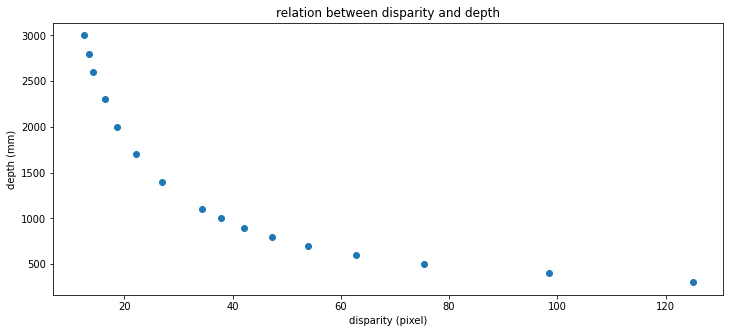

In [3]:
mapping = np.load('./data/depth_map_notebook.npy')
disp = [np.float32(value[0]) for value in mapping]
depth = [np.float32(value[1]) for value in mapping]

plt.figure(figsize=(12,5))

plt.ylabel('depth (mm)')
plt.xlabel('disparity (pixel)')
plt.title('relation between disparity and depth')
plt.scatter(disp, depth)

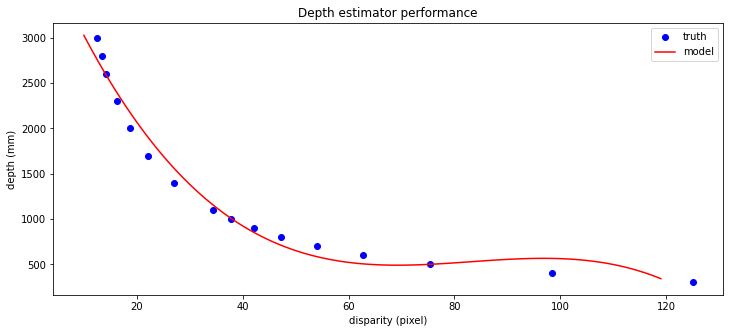

In [4]:
x = np.arange(10, 120, 1)
y = [estimator.predict_depth(xi) for xi in x]

plt.figure(figsize=(12,5))
plt.title('Depth estimator performance')
plt.ylabel('depth (mm)')
plt.xlabel('disparity (pixel)')
plt.scatter(disp, depth, color='blue', label='truth')
plt.plot(x, y, color='red', label='model')
plt.legend()
plt.show()

In [5]:
model = estimator.depth_prediction_model.steps
model

[('poly', PolynomialFeatures(degree=3)), ('lienar', LinearRegression())]

In [6]:
regresion_model = model[1][1]
x = regresion_model.coef_
x = x[0]
for i in x:
  print(i)

0.0
-144.54135
1.7902485
-0.0071868896


In [7]:
regresion_model.intercept_

array([4301.4795], dtype=float32)